In [1]:
library(lmtest)
library(car)
library(carData)
library(ggplot2)
library(zoo)
library(sandwich)
library(dynlm)
library(tseries)
library(forecast)
library(tseries)
library(urca)

Warning message:
"package 'lmtest' was built under R version 4.2.2"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.2.2"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Warning message:
"package 'car' was built under R version 4.2.2"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.2.2"
Warning message:
"package 'ggplot2' was built under R version 4.2.2"
Warning message:
"package 'sandwich' was built under R version 4.2.2"
Warning message:
"package 'dynlm' was built under R version 4.2.2"
Warning message:
"package 'tseries' was built under R version 4.2.2"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'forecast' was built under R version 4.2.2"
Warning message:
"package 'urca' was built under R version 4.2.2"


### TAO Random Walk

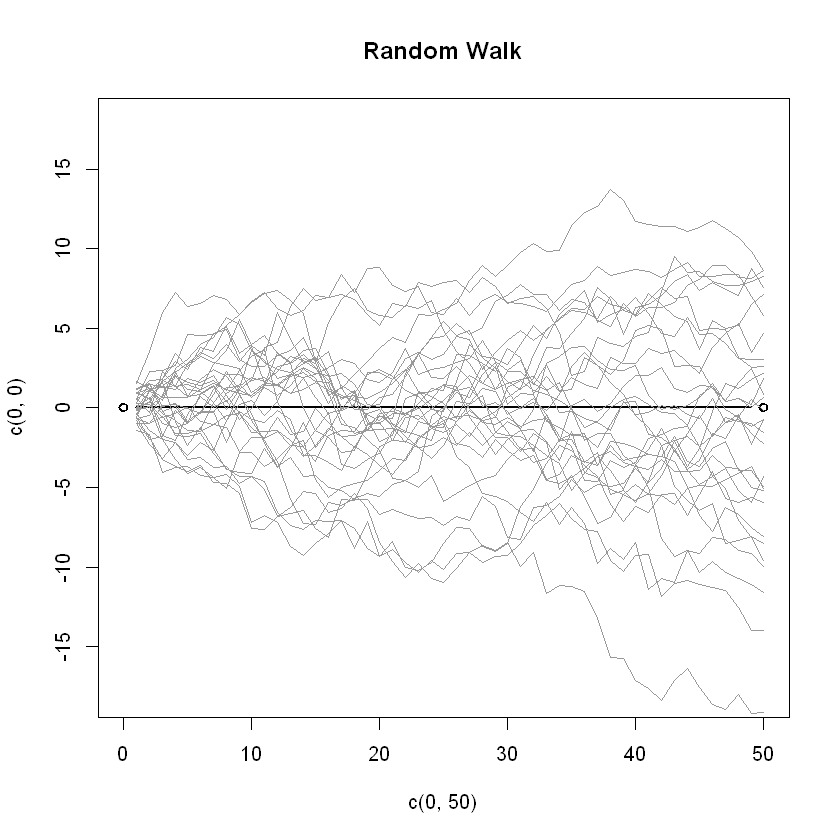

In [2]:
# Tao truc toa do x= (0,50), y=(-18,18), gốc (0,0)
plot(c(0,50),c(0,0),type="b", lwd=2,ylim=c(-18,18), main= "Random Walk")
#lopp over draw
for (r in 1:30){
  # i.i.d stadard normal shock
  e=rnorm(50)
  # Random Walk as cummulative sum shocks
  y=ts(cumsum(e))
  # Add line to graph
  lines(y,col=gray(.6))
}


### TAO RA Random Walk with Drift

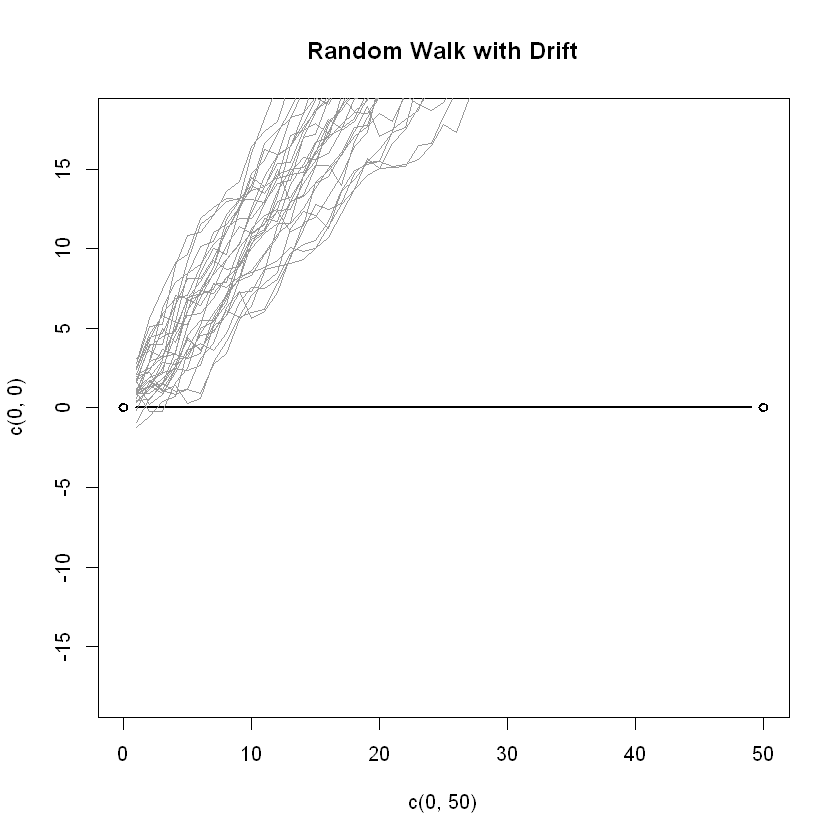

In [4]:
plot(c(0,50),c(0,0),type="b", lwd=2,ylim=c(-18,18), main="Random Walk with Drift")
#lopp over draw
for (r in 1:30){
  # i.i.d stadard normal shock
  e=rnorm(50)
  # Random Walk as cummulative sum shocks
  y=ts(cumsum(1+e))
  # Add line to graph
  lines(y,col=gray(.6))
}


### SAI PHAN CUA Random Walk with Drift

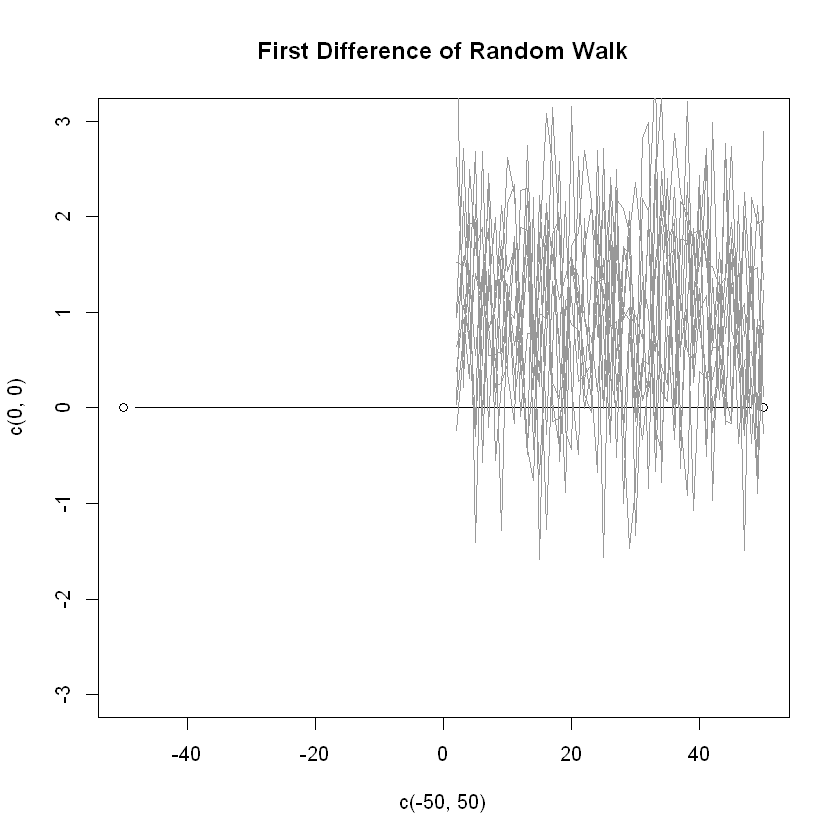

In [12]:
# Tao 1000 phần tử từ phân bố chuẩn hóa
# u=rnorm(1000, 0, 1)
plot(c(-50,50), c(0,0),type="b",ylim=c(-3,3), main="First Difference of Random Walk")
#lopp over draw
for (r in 1:10){
  # i.i.d stadard normal shock
  # Random Walk  with Drift as cummulative sum shocks
  u=rnorm(50, 0, 1)
  y=ts(cumsum(1+u))
  #First Difference
  Dy=diff(y)
  # Add line to graph
  lines(Dy,col=gray(.6))
}


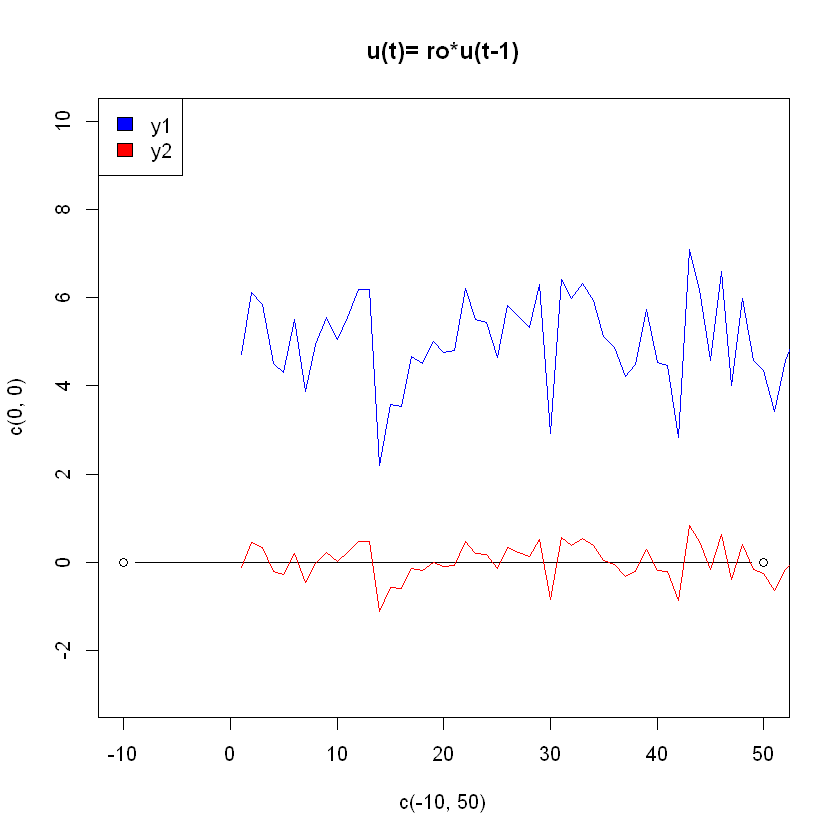

In [13]:
# Tao 1000 phần tử từ phân bố chuẩn hóa
# u=rnorm(1000, 0, 1)
plot(c(-10,50), c(0,0),type="b",ylim=c(-3,10), main="u(t)= ro*u(t-1)")
#lopp over draw
  u=rnorm(500, 0, 1)
  y1=ts(5+u)
  y2=0.4*lag(u,1)
  lines(y1,col="blue",lwd=1)
  lines(y2,col="red",lwd = 1)
  legend("topleft",c("y1","y2"), fill=c("blue","red"))


### ĐỌC SỐ LIỆU VÀ BIẾN SỐ

In [8]:
library(readxl)
goldoilprice=read_excel("goldoilprice.xls")

In [9]:
goldoilprice

date,goldprice,oilprice,trend
<dttm>,<dbl>,<dbl>,<dbl>
2006-01-01,633.71,72.51,1
2007-02-01,632.59,71.81,2
2008-03-01,598.19,61.97,3
2009-04-01,585.78,57.95,4
2010-05-01,627.83,58.13,5
2011-06-01,629.79,61.00,6
2012-07-01,631.17,53.40,7
2013-08-01,664.75,57.58,8
2014-09-01,654.90,60.60,9


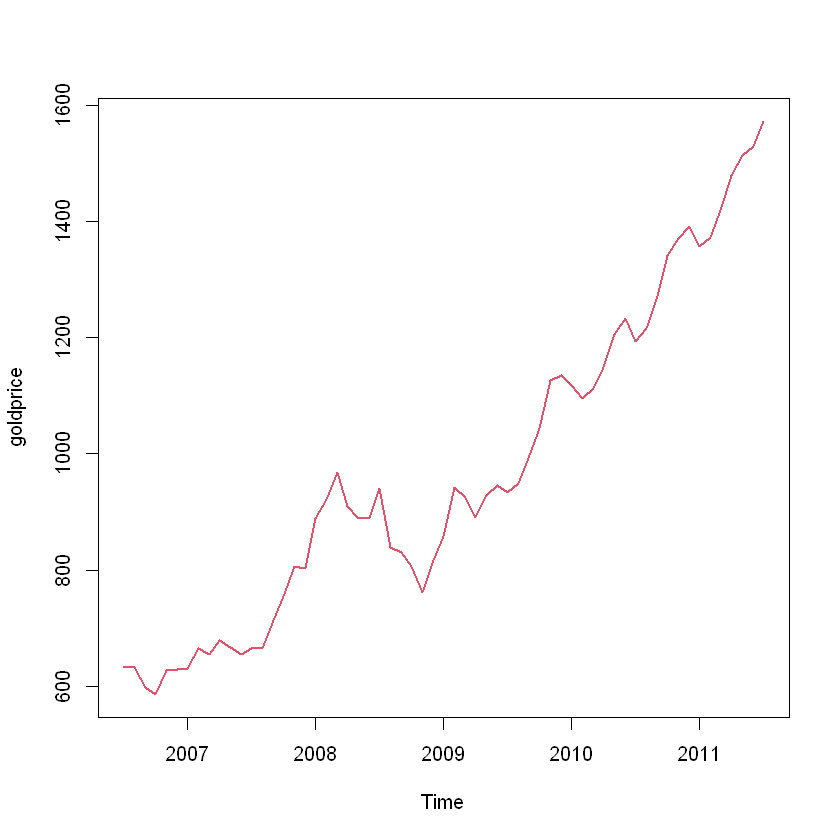

In [6]:


# View(goldoilprice)

# Gán thời gian cho file số liệu. Năm frequency=1; Quý: frequency=4; Tháng: frequency=12

# Chuyển thành chuối thời gian

goldprice=ts(goldoilprice$goldprice, start=c(2006,7), frequency=12)

plot(goldprice,xlab="Time", ylab="goldprice", lwd = 2, col=2) 


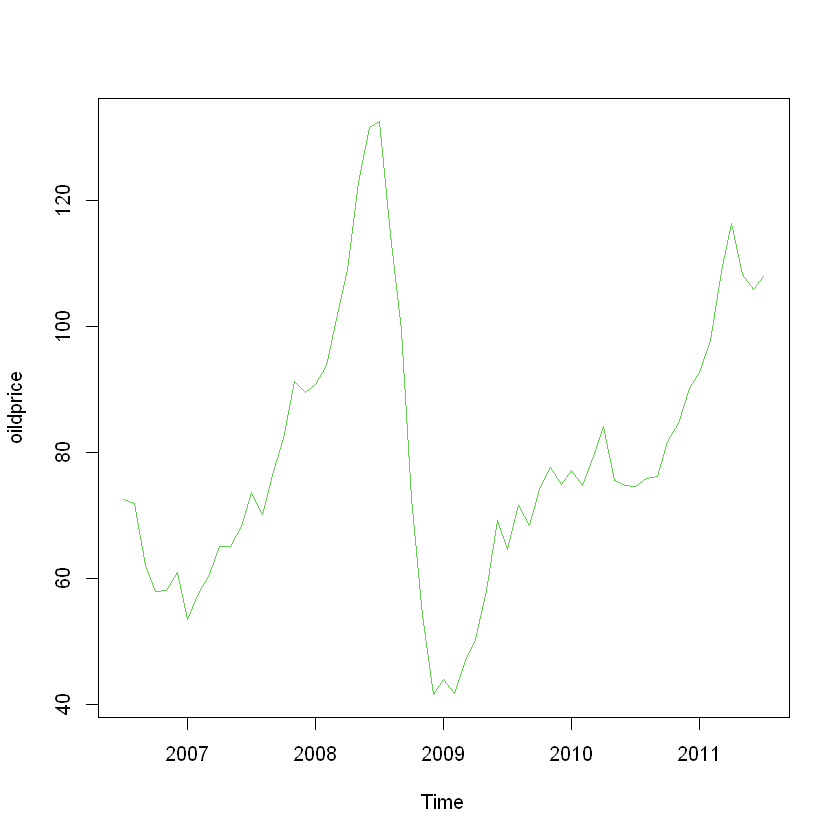

In [2]:
oilprice=ts(goldoilprice$oilprice, start=c(2006,7), frequency=12)

plot(oilprice,xlab="Time", ylab="oildprice", lwd = 1, col=3) 

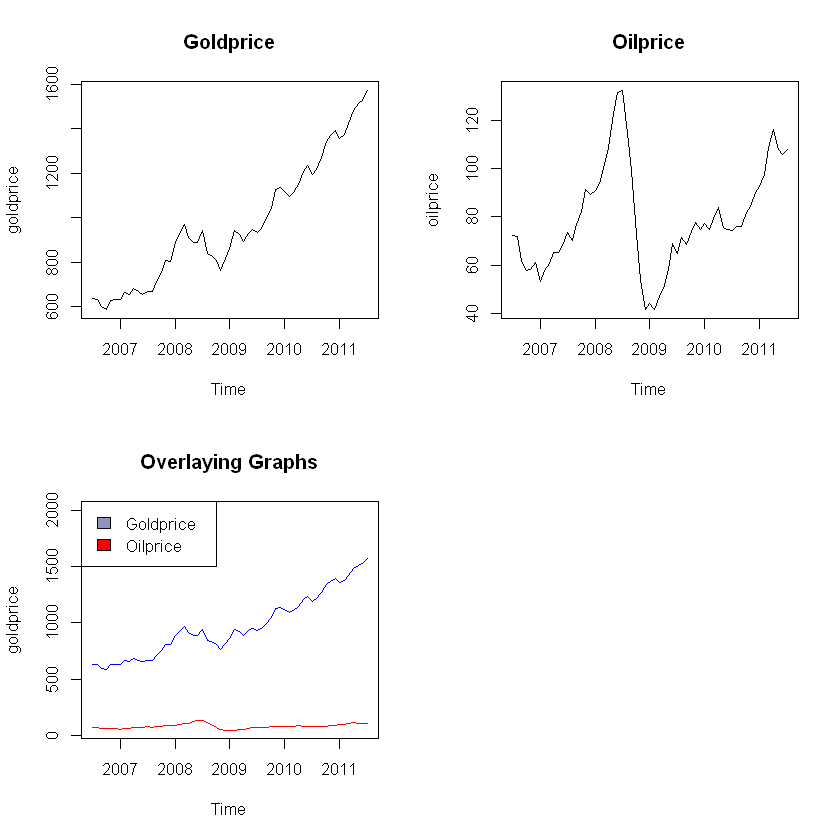

In [3]:
# plot(oilprice, goldprice,xlab="Oilprice", ylab="Goldprice", lwd = 2) 


par(mfrow = c(2,2))
plot(goldprice, main = "Goldprice")
plot(oilprice, main = "Oilprice")

plot(goldprice,
main="Overlaying Graphs",
ylim= c(50,2000),
type="l",
col="blue")
lines(oilprice, col="red")
legend("topleft",
c("Goldprice","Oilprice"),
fill=c("#9292c0","red")
)



par(mfrow = c(1,1))


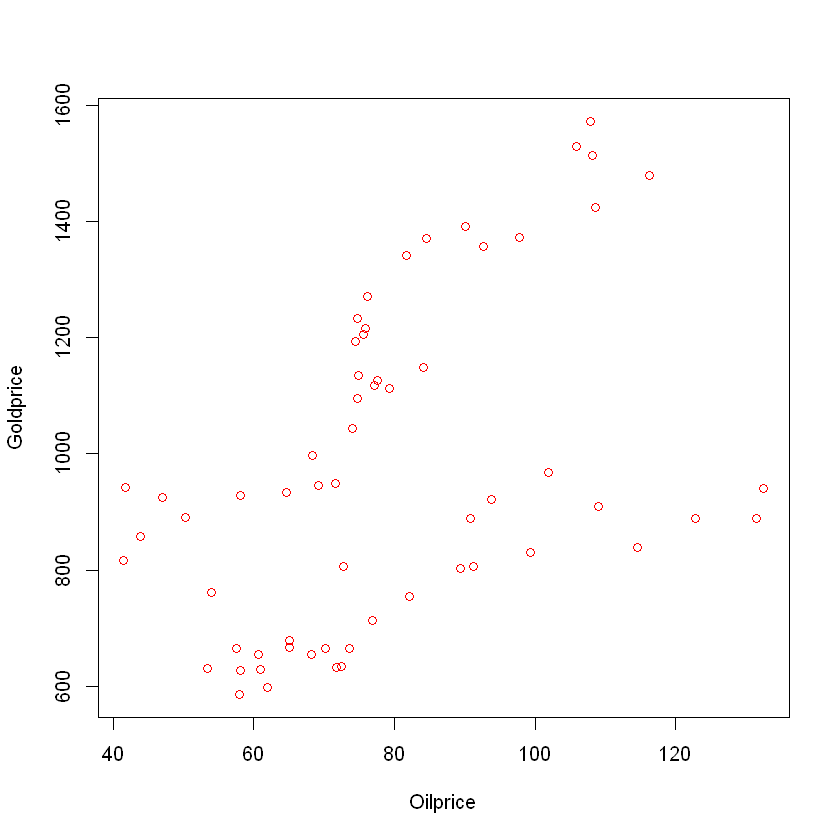

In [4]:
plot(goldoilprice$oilprice,goldoilprice$goldprice, xlab="Oilprice", ylab="Goldprice",col="red" )

In [7]:
goldprice

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2006,,,,,,,633.71,632.59,598.19,585.78,627.83,629.79
2007,631.17,664.75,654.90,679.37,667.31,655.66,665.38,665.41,712.65,754.60,806.25,803.20
2008,889.60,922.30,968.43,909.71,888.66,889.49,939.77,839.03,829.93,806.62,760.86,816.09
2009,858.69,943.00,924.27,890.20,928.65,945.67,934.23,949.38,996.59,1043.16,1127.04,1134.72
2010,1117.96,1095.41,1113.34,1148.69,1205.43,1232.92,1192.97,1215.81,1270.98,1342.02,1369.89,1390.55
2011,1356.40,1372.73,1424.00,1479.76,1512.60,1528.66,1572.21,,,,,


In [5]:
goldoilprice

date,goldprice,oilprice,trend
<dttm>,<dbl>,<dbl>,<dbl>
2006-01-01,633.71,72.51,1
2007-02-01,632.59,71.81,2
2008-03-01,598.19,61.97,3
2009-04-01,585.78,57.95,4
2010-05-01,627.83,58.13,5
2011-06-01,629.79,61.00,6
2012-07-01,631.17,53.40,7
2013-08-01,664.75,57.58,8
2014-09-01,654.90,60.60,9
